In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics

plt.style.use('seaborn')
pd.set_option('display.max_columns', 100)

In [63]:
# Loading dataset

In [64]:
data_1 = pd.read_csv('data_1.csv')

In [65]:
data_1 = data_1[['V1','V2']]

In [66]:
data = data_1.iloc[1:,:]# = 
data.columns = data_1.iloc[0]

In [67]:
data = data.astype(float)

In [68]:
#Observing data

In [69]:
data.head(10)

,density,gain
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5
7,0.686,18.7
8,0.686,17.4
9,0.686,18.6
10,0.686,16.8


In [70]:
# Scenario 1, Fitting

In [71]:
#Use the data to fit the gain,or a transformation of gain,to density.

#Try sketching the least squares line on a scatter plot.

Text(0.5, 1.0, 'Scatter plot of the Gain and the Density data')

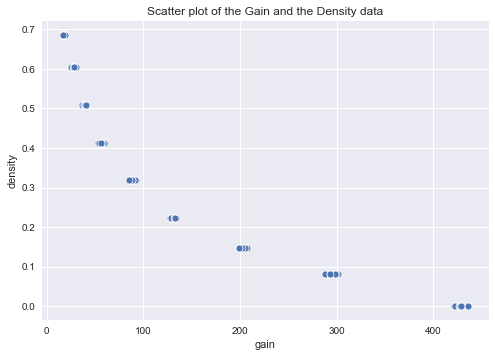

In [72]:
sns.scatterplot(data.gain, data.density)
plt.title("Scatter plot of the Gain and the Density data")

Text(0.5, 1.0, 'Scatter plot of the log-transformed Gain and the Density data')

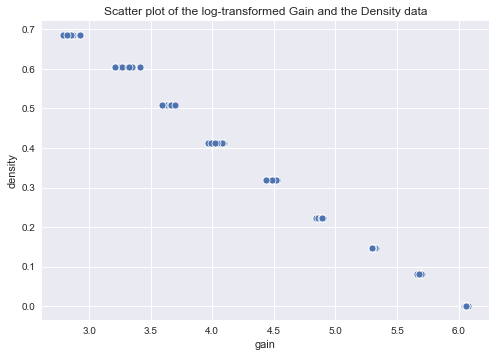

In [73]:
sns.scatterplot(np.log(data.gain), data.density)
plt.title("Scatter plot of the log-transformed Gain and the Density data")

In [74]:
temp = data.groupby('density').gain.apply(lambda x: np.log(x.mean())).to_frame().reset_index()#.plot(kind = 'scatter', x = 'density', y = 'gain')

Text(0.5, 1.0, 'Scatter plot of the mean log-transformed Gain and the Density data')

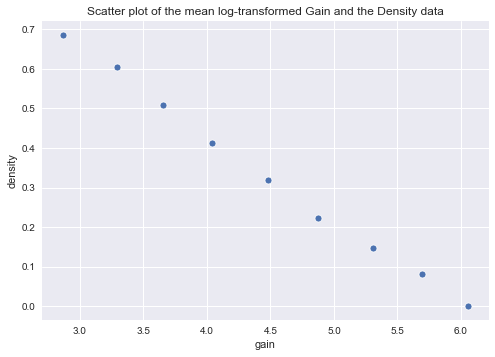

In [75]:
sns.scatterplot(temp.gain, temp.density)
plt.title("Scatter plot of the mean log-transformed Gain and the Density data")

In [76]:
# least square line and scatter plot of original data of log transformation

In [77]:
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

In [78]:
# Least Absolute Devidations Regression Line

In [79]:
data = data.assign(logy = np.log(data.gain))

In [80]:
data.head()

,density,gain,logy
1,0.686,17.6,2.867899
2,0.686,17.3,2.850707
3,0.686,16.9,2.827314
4,0.686,16.2,2.785011
5,0.686,17.1,2.839078


In [81]:
mod = smf.quantreg('density ~ logy', data)
res = mod.fit(q=.5)

In [82]:
res.params

Intercept    1.295485
logy        -0.215571
dtype: float64

In [83]:
ladr_slope,ladr_intercept  = res.params['logy'], res.params['Intercept']

In [84]:
ladr_slope

-0.21557061687315954

In [85]:
minimum = (min(data.logy) - .1)* ladr_slope + ladr_intercept

In [86]:
maximum = (max(data.logy) + .1)* ladr_slope + ladr_intercept

In [87]:
temp = data.groupby('density').gain.apply(lambda x: np.log(x.mean())).to_frame().reset_index()#.plot(kind = 'scatter', x = 'density', y = 'gain')

In [88]:
temp

,density,gain
0,0.001,6.056081
1,0.080,5.690697
2,0.148,5.305293
3,0.223,4.872139
4,0.318,4.482890
5,0.412,4.039888
6,0.508,3.651956
7,0.604,3.293241
8,0.686,2.862772


Text(0.5, 1.0, 'Regression line for Density and log-transformed Gain')

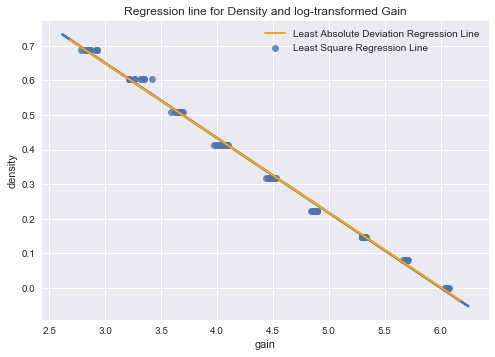

In [89]:
sns.regplot(np.log(data.gain), data.density, ci = None, label = 'Least Square Regression Line')
plt.plot([min(data.logy) - .1, max(data.logy) + .1],[minimum, maximum],linewidth=2, label = 'Least Absolute Deviation Regression Line', color = 'orange')
plt.legend()
plt.title('Regression line for Density and log-transformed Gain')

In [90]:
# Get the parameter of least square line
from scipy import stats

In [91]:
#least square line of original data
stats.linregress(data.gain, data.density)

LinregressResult(slope=-0.0015334078316468012, intercept=0.5497239543095568, rvalue=-0.9031596703485595, pvalue=4.518580918276382e-34, stderr=7.76993788865363e-05)

In [92]:
#least square line of log-transformed data
stats.linregress(np.log(data.gain), data.density)

LinregressResult(slope=-0.2162032010958118, intercept=1.2980126052584202, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.0014935062316818886)

In [93]:
#Least Absolute Deviations Regression Line
print("slope = {}".format(ladr_slope))
print("intercept = {}".format(ladr_intercept))

slope = -0.21557061687315954
intercept = 1.2954851423146152


In [94]:
slope = stats.linregress(np.log(data.gain), data.density)[0]
intercept = stats.linregress(np.log(data.gain), data.density)[1]

In [95]:
pred = np.log(data.gain) * slope + intercept

In [96]:
residuals = data.density - pred
#residuals = np.exp(residuals)

Text(0.5, 1.0, 'Residuals of Least Squares Regression Line (Log transformed)')

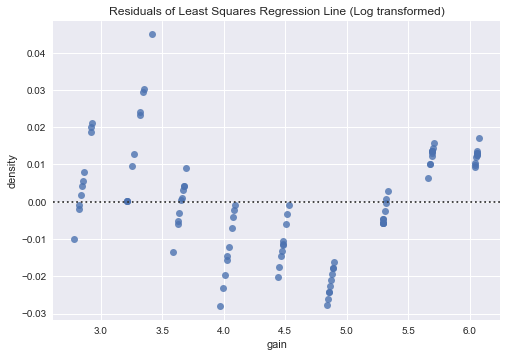

In [97]:
sns.residplot(np.log(data.gain), data.density)
plt.title('Residuals of Least Squares Regression Line (Log transformed)')

In [98]:
pred_ladr = np.log(data.gain) *ladr_slope + ladr_intercept
residuals_ladr = data.density - pred_ladr

Text(0.5, 1.0, 'Residuals of Least Absolute Deviations Regression Line (Log transformed)')

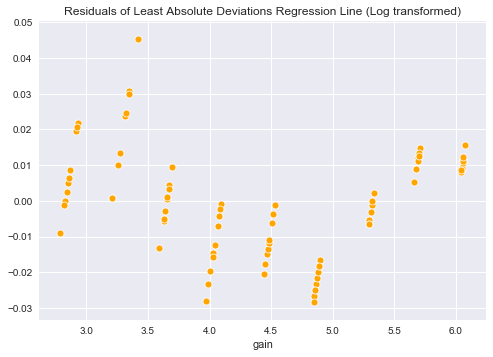

In [99]:
sns.scatterplot(np.log(data.gain), residuals_ladr, color = 'orange')
plt.title('Residuals of Least Absolute Deviations Regression Line (Log transformed)')

Text(0.5, 1.0, 'Histogram of Residuals of Least Squares Regresion Line')

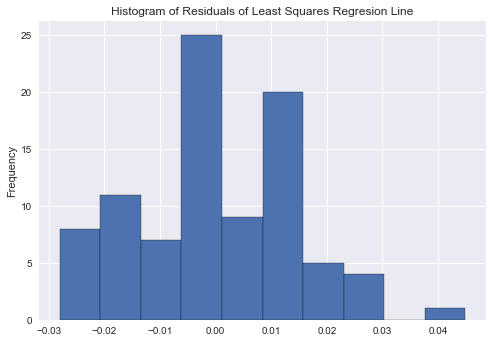

In [100]:
residuals.plot(kind = 'hist', edgecolor = 'k')
plt.title('Histogram of Residuals of Least Squares Regresion Line')

Text(0.5, 1.0, 'Histogram of Residuals of Least Absolute Deviations Regression Line')

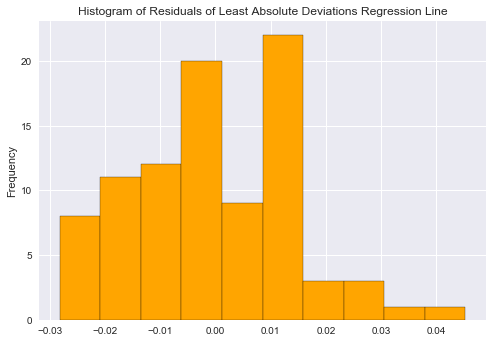

In [102]:
residuals_ladr.plot(kind = 'hist', edgecolor = 'k', color = 'orange')
plt.title('Histogram of Residuals of Least Absolute Deviations Regression Line')

In [103]:
import statsmodels.api as sm

In [104]:
# QQ plot of residuals of Least Squares Regresion Line

Text(0.5, 1.0, 'QQ plot of residuals of Least Squares Regresion Line')

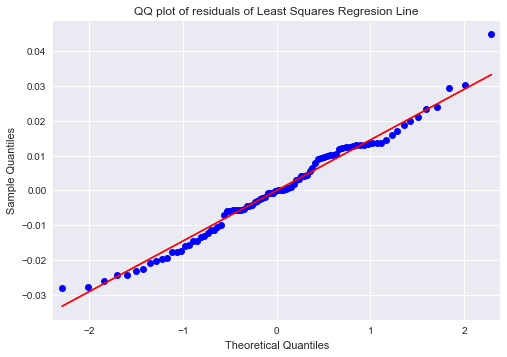

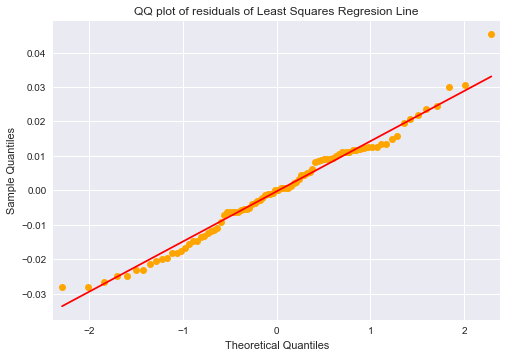

In [105]:
sm.qqplot(residuals, color = 'blue', line="s")
plt.title('QQ plot of residuals of Least Squares Regresion Line')
sm.qqplot(residuals_ladr, color = 'orange', line="s")
plt.title('QQ plot of residuals of Least Squares Regresion Line')

In [39]:
#Scenario 2, Predicting
a = 38.6 
b = 426.7

In [40]:
# plot for ls of log transformed c.i & prediction interval

In [157]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1]: M. Duarte.  "Curve fitting," JUpyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t*s_err*np.sqrt(1/n + (x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0/float(nboot))

    return ax

In [41]:
x = data.density
y = np.log(data.gain)

NameError: name 'plot_ci_manual' is not defined

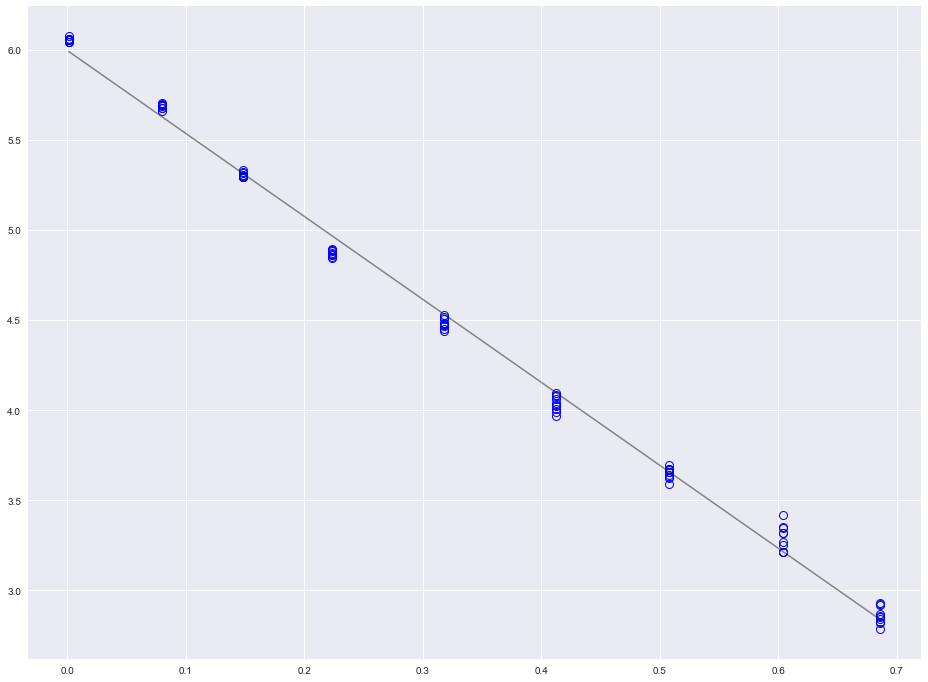

In [42]:
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = len(y)                                          # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)                          # chi-squared; estimates error in data
chi2_red = chi2/(dof)                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(dof))                    # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 12))

# Data
ax.plot(
    x, y, "o", color="#b9cfe7", markersize=8, 
    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
)

# Fit
ax.plot(x,y_model,"-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="None", linestyle="--")
ax.plot(x2, y2-pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="0.5")


# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
plt.title("Fit Plot for density vs. gain", fontsize="14", fontweight="bold")
plt.xlabel("density")
plt.ylabel("gain")
plt.xlim(np.min(x)-.01,np.max(x)+.01)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0, 1)
anyArtist = plt.Line2D((0,1), (0,0), color="#b9cfe7")      # create custom artists
legend = plt.legend(
    [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
    [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
    loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand"
)  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
#plt.tight_layout()
#plt.savefig("filename.png", bbox_extra_artists=(legend,), bbox_inches="tight")

plt.show()

In [160]:
0.508, 0.001

(0.508, 0.001)

In [44]:
#Least Square

In [45]:
lse = stats.linregress(np.log(data.gain),data.density)

In [46]:
lse

LinregressResult(slope=-0.2162032010958118, intercept=1.2980126052584202, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.0014935062316818886)

In [47]:
mod = smf.quantreg('density ~ logy', data)
res = mod.fit(q=.5)

In [48]:
#ls pred of a
pred = lse[0] * np.log(a) + lse[1]
pred

0.5081677686748749

In [49]:
#ladr pred
pred_ladr = res.params['logy'] * np.log(a) + res.params['Intercept']
pred_ladr

0.507951295482532

In [50]:
#pi = t*lse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [51]:
#CI of ls pred, assume known variance
me = pi
pred - me, pred + me

(0.5035380300653877, 0.5127975072843621)

In [54]:
#pi = t*lse[4]*np.sqrt(1+1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1+1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [55]:
#confidence this interval contains the density of the next data point with the given gain.
me = pi
pred - me, pred + me

(0.5026683432077468, 0.513667194142003)

In [58]:
#ls pred of b
pred = lse[0] * np.log(b) + lse[1]
pred

-0.011331534157646539

In [59]:
#ladr pred of b
pred_ladr = res.params['logy'] * np.log(b) + res.params['Intercept']
pred_ladr

-0.010028015689436343

In [57]:
#pi = t*lse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((np.log(b)-np.mean(x))**2))
pi = t*lse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2))

In [60]:
#CI of ls pred of b
me = pi
pred - me, pred + me

(-0.014316007458927194, -0.008347060856365884)

In [60]:
#pi = t*lse[4]*np.sqrt(1+1/n+(np.log(b)-np.mean(x))**2/np.sum((np.log(b)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1+1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [62]:
#prediction interval
me = pi
pred - me, pred + me

(-0.019832713183327882, -0.0028303551319651937)

In [66]:
# Scenario 3

In [67]:
a = 38.6
y = 0.508
b = 426.7

In [68]:
data = data[['density','gain']]

In [95]:
train = data[data.density!=0.508]
test = data[data.density == 0.508]

In [113]:
x = np.log(train.gain)
n = len(train)

In [114]:
lse_inverse = stats.linregress(np.log(train.gain),train.density)

In [115]:
lse_inverse

LinregressResult(slope=-0.21939480578847745, intercept=1.3101139571723364, rvalue=-0.9975044282259324, pvalue=1.4595319821337145e-91, stderr=0.001758300564531426)

In [116]:
slope, intercept = lse_inverse[0], lse_inverse[1]

In [117]:
#ls
pred = np.log(a) * slope + intercept
pred

0.5086093834797153

In [118]:
train = train.assign(logy = np.log(train.gain))

In [119]:
#ladr
mod = smf.quantreg('density ~ logy', train)
res = mod.fit(q=.5)

In [120]:
pred_ladr = res.params['logy'] * np.log(a) + res.params['Intercept']
pred_ladr

0.5071270446244772

In [121]:
#pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [122]:
me = pi
pred - me, pred + me

(0.5081392768505033, 0.5090794901089273)

In [123]:
#pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2))
pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2))

In [124]:
me = pi
pred - me, pred + me

(0.5050836490159607, 0.5121351179434699)

In [126]:
train = data[data.density!=0.001]
test = data[data.density == 0.001]

In [127]:
x = np.log(train.gain)
n= len(train)

In [128]:
lse_inverse = stats.linregress(np.log(train.gain),train.density)

In [129]:
slope, intercept = lse_inverse[0], lse_inverse[1]

In [130]:
pred = np.log(b) * slope + intercept
pred

-0.018558799389517766

In [131]:
pred_ladr = res.params['logy'] * np.log(b) + res.params['Intercept']
pred_ladr

-0.01901600787694213

In [132]:
pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [133]:
me = pi
pred - me, pred + me

(-0.01940477410066668, -0.017712824678368853)

In [134]:
pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [135]:
me = pi
pred - me, pred + me

(-0.022154001258395402, -0.014963597520640129)

In [92]:
#Additional Temperature, Day Of Year, and Latitude

In [136]:
addata = pd.read_csv('Full Resolution Data/64503600.csv')
addata = addata.astype(float)
addata.head()

,BuoyID,Year,Hour,Min,DOY,POS_DOY,Lat,Lon,BP,Ts
0,64503600.0,2017.0,12.0,0.0,7.500,7.500,63.0656,-5.0590,1018.6,6.19
1,64503600.0,2017.0,13.0,0.0,7.542,7.542,63.0654,-5.0358,1017.8,6.13
2,64503600.0,2017.0,14.0,0.0,7.583,7.583,63.0646,-5.0112,1017.2,6.11
3,64503600.0,2017.0,15.0,0.0,7.625,7.625,63.0654,-4.9860,1016.2,6.10
4,64503600.0,2017.0,16.0,0.0,7.667,7.667,63.0692,-4.9632,1015.6,6.08


In [137]:
X = addata.drop('Ts',axis = 1)
y = addata.Ts

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

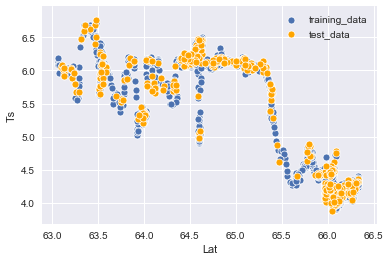

In [140]:
sns.scatterplot(x = X_train.Lat, y = y_train, label = 'training_data')
sns.scatterplot(x = X_test.Lat, y = y_test, color = 'orange', label = 'test_data')
plt.legend()

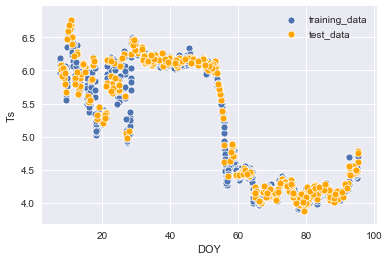

In [141]:
sns.scatterplot(x = X_train.DOY, y = y_train, label = 'training_data')
sns.scatterplot(x = X_test.DOY, y = y_test, color = 'orange', label = 'test_data')
plt.legend()

In [142]:
# First attemp w/ Temperature & DOY with linear model

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
reg = LinearRegression()

In [145]:
reg.fit(X_train['DOY'].values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
reg.score(X_test['DOY'].values.reshape(-1, 1), y_test)

0.6765715698207323

In [147]:
reg.coef_

array([-0.02943978])

In [148]:
reg.intercept_

6.720806552184966

In [167]:
ols = sm.OLS(y_train, [[1, x] for x in X_train['DOY'].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3213.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:54:35   Log-Likelihood:                -1305.8
No. Observations:                1655   AIC:                             2616.
Df Residuals:                    1653   BIC:                             2626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7208      0.030    224.240      0.000       6.662       6.780
x1            -0.0294      0.001    -56.686      0.000      -0.030      -0.028
==============================================================================
Omnibus:                     1290.211   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.954
Skew:                           0.134   Prob(JB):                     2.67e-23
Kurtosis:                       1.802   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
# Second attemp w/ Temperature & Latitude with linear model

In [169]:
reg = LinearRegression()
reg.fit(X_train['Lat'].values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
reg.score(X_test['Lat'].values.reshape(-1, 1), y_test)

0.6898875623086707

In [171]:
reg.coef_

array([-0.82272586])

In [172]:
reg.intercept_

58.795163977181524

In [173]:
ols = sm.OLS(y_train, [[1, x] for x in X_train['Lat'].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     3735.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:55:03   Log-Likelihood:                -1221.4
No. Observations:                1655   AIC:                             2447.
Df Residuals:                    1653   BIC:                             2458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7952      0.877     67.032      0.000      57.075      60.516
x1            -0.8227      0.013    -61.118      0.000      -0.849      -0.796
==============================================================================
Omnibus:                      204.211   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.866
Skew:                           0.192   Prob(JB):                     2.23e-14
Kurtosis:                       2.126   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# Third attemp w/ Temperature & DOY & Latitude with linear model

In [190]:
reg = LinearRegression()

In [191]:
reg.fit(X_train[['DOY', 'Lat']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
reg.score(X_test[['DOY', 'Lat']], y_test)

0.7004325114815008

In [193]:
reg.coef_

array([-0.00889138, -0.59386135])

In [194]:
reg.intercept_

44.34563699315345

In [195]:
ols = sm.OLS(y_train, [[1]+ list(x) for x in X_train[['DOY','Lat']].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1926.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:59:35   Log-Likelihood:                -1203.5
No. Observations:                1655   AIC:                             2413.
Df Residuals:                    1652   BIC:                             2429.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3456      2.552     17.376      0.000      39.340      49.351
x1            -0.0089      0.001     -6.021      0.000      -0.012      -0.006
x2            -0.5939      0.040    -14.744      0.000      -0.673      -0.515
==============================================================================
Omnibus:                      190.626   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.606
Skew:                           0.187   Prob(JB):                     6.91e-14
Kurtosis:                       2.141   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""